In [2]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [3]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

6552 3430


python/smoothn.py:186: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
python/smoothn.py:204: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


0.61755517618


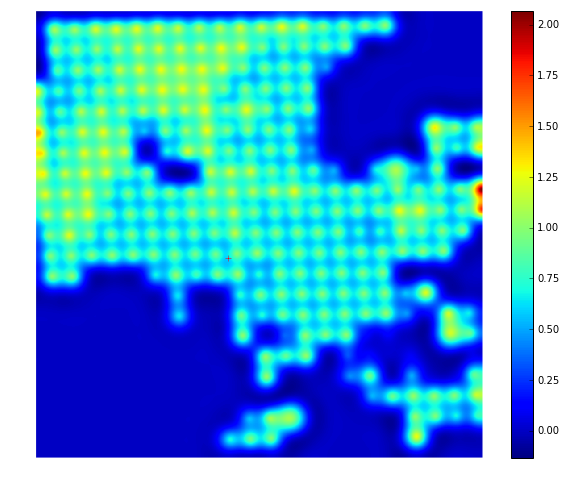

In [6]:
data = parallel_rw_pkl(None, 'Bird0306_atm', 'r')
lat, lon =-25.89889,139.34583
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [21]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160201_160531_Birdsville.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][234:239]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
234,05:05:2016,00:41:16,126.028657,NaN,0.015324,0.018028,0.020761,NaN,NaN,NaN,NaN,NaN,0.025627,NaN,NaN,0.027763,NaN,0.036791,0.038695,1.170603
235,05:05:2016,01:41:17,126.070336,NaN,0.014840,0.017977,0.021925,NaN,NaN,NaN,NaN,NaN,0.026200,NaN,NaN,0.027933,NaN,0.036368,0.037077,1.190776
236,05:05:2016,04:41:16,126.195324,NaN,0.016105,0.018177,0.023134,NaN,NaN,NaN,NaN,NaN,0.030733,NaN,NaN,0.031947,NaN,0.042709,0.040703,1.392021
237,05:05:2016,05:41:14,126.236968,NaN,0.016552,0.018484,0.022631,NaN,NaN,NaN,NaN,NaN,0.030136,NaN,NaN,0.032281,NaN,0.041626,0.041729,1.367763
238,05:05:2016,06:58:49,126.290845,NaN,0.016453,0.018044,0.021040,NaN,NaN,NaN,NaN,NaN,0.029790,NaN,NaN,0.032508,NaN,0.040587,0.041158,1.362675


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


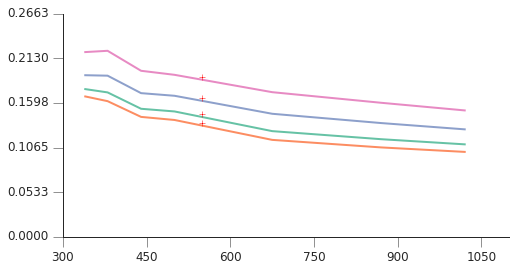

In [11]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [12]:
aot550

[array(0.13545481613874327),
 array(0.14608010597730847),
 array(0.16550842727369297),
 array(0.19037572573241734)]

In [ ]:
0.61755517618, 0.1335

6552 3430
0.607224231032


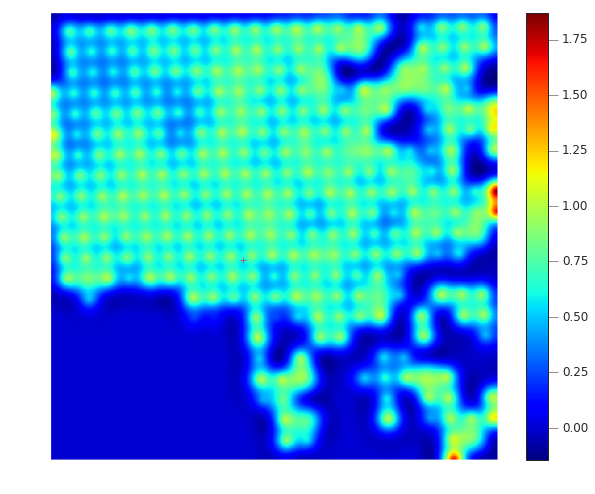

In [13]:
data = parallel_rw_pkl(None, 'Bird0405_atm', 'r')
lat, lon =-25.89889,139.34583
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [ ]:
0.607224231032, 

6552 3430
0.439814318001


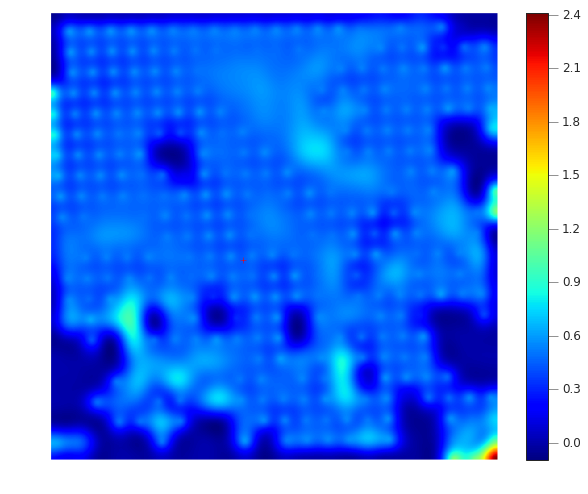

In [17]:
data = parallel_rw_pkl(None, 'Bird0505_atm', 'r')
lat, lon =-25.89889,139.34583
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

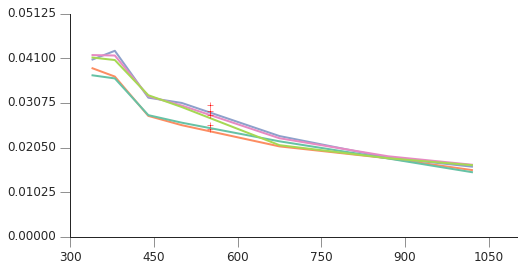

In [22]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

6552 3430


python/smoothn.py:186: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
python/smoothn.py:204: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


0.432932989714


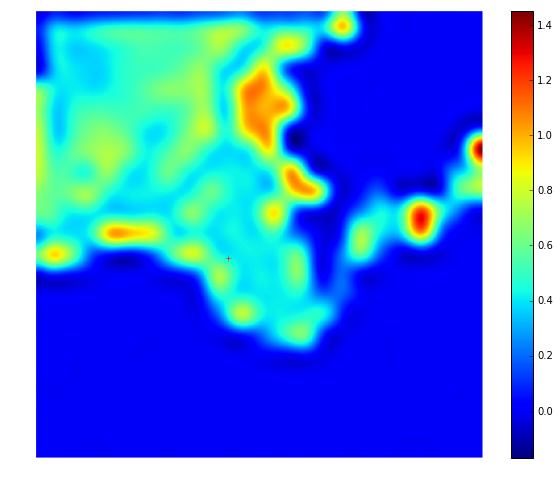

In [5]:
data = parallel_rw_pkl(None, 'Bird0205_atm', 'r')
lat, lon =-25.89889,139.34583
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [8]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160201_160531_Birdsville.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][10:16]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
10,05:02:2016,05:58:46,36.249144,0.041373,0.042334,0.052011,0.063958,NaN,NaN,NaN,NaN,NaN,0.071710,NaN,NaN,0.082973,NaN,0.103529,0.100552,2.076429
11,05:02:2016,08:24:39,36.350451,0.042956,0.046899,0.051539,0.057613,NaN,NaN,NaN,NaN,NaN,0.068778,NaN,NaN,0.073407,NaN,0.087425,0.090138,2.006438
12,05:02:2016,21:33:32,36.898287,0.028074,0.027165,0.032422,0.039044,NaN,NaN,NaN,NaN,NaN,0.055704,NaN,NaN,0.055614,NaN,0.068275,0.066913,2.881002
13,05:02:2016,21:56:07,36.913970,0.029019,0.027150,0.033112,0.040382,NaN,NaN,NaN,NaN,NaN,0.057209,NaN,NaN,0.056690,NaN,0.070363,0.067750,2.942514
14,05:02:2016,23:10:04,36.965324,0.032372,0.028524,0.037152,0.047758,NaN,NaN,NaN,NaN,NaN,0.066756,NaN,NaN,0.064841,NaN,0.080978,0.074604,3.091355
15,05:02:2016,23:58:51,36.999201,0.034944,0.031868,0.041672,0.054406,NaN,NaN,NaN,NaN,NaN,0.071205,NaN,NaN,0.074671,NaN,0.092779,0.086925,3.316232


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


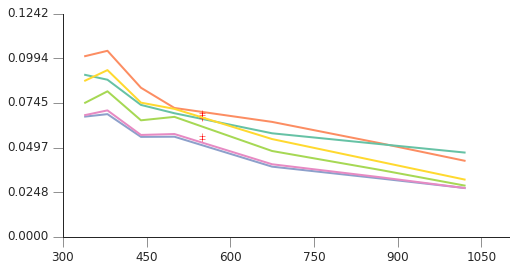

In [9]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [10]:
aot550

[array(0.0680127234295553),
 array(0.06629052011965429),
 array(0.05431657186170517),
 array(0.056175279989736426),
 array(0.06648275018762542),
 array(0.06916968254544742)]

In [24]:
np.mean(aot550)

0.027534305329845347

In [ ]:
0.439814318001,0.027534305329845347

In [ ]:
0.61755517618, 0.1335
0.439814318001,0.027534305329845347